## Capstone 2 Exploratory Data Analysis
### NBA Salary Predictor and Trade Suggestion
### Austin Cody

In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suppressing FutureWarning related to deprecated append method
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Loading our newly cleaned csv into pandas DataFrame
df = pd.read_csv('nba_salaries_cleaned.csv')

In [3]:
df.head()

,name,salary,position,age,team,games_played,games_started,minutes_pg,field_goals_pg,field_goal_attempts_pg,...,free_throw_%,o_rebounds_pg,d_rebounds_pg,total_rebounds_pg,assists_pg,steals_pg,blocks_pg,turnovers_pg,personal_fouls_pg,points_pg
0,Stephen Curry,48070014,['PG'],34,['GSW'],56,56,34.7,10.0,20.2,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
1,John Wall,47345760,['PG'],32,['LAC'],34,3,22.2,4.1,9.9,...,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4
2,Russell Westbrook,47080179,['PG'],34,"['LAL', 'LAC']",73,24,29.1,5.9,13.6,...,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9
3,LeBron James,44474988,['PF'],38,['LAL'],55,54,35.5,11.1,22.2,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
4,Kevin Durant,44119845,['PF'],34,"['BRK', 'PHO']",47,47,35.6,10.3,18.3,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1


In [4]:
# TASK: examine every feature using either histograms, bi-plots, or other visual and numeric means.

In [5]:
# TASK: examine relationship strengths using Pearson correlation coefficients and other statistical methods

# Categorical Variables
### Position

In [6]:
# categorical variables position and team are stored as strings (they were stored as lists previously)
# this is an issue as i need to iterate through the items in the list, but the csv import/export process took the list as a string

In [7]:
#turning position column back into a list
for i in range(len(df['position'])):
    string = df['position'][i]
    string = string.strip("[]'")
    df.at[i, 'position'] = string.split("', '")

In [8]:
#position column is a list with one or more positions in it
dictionary_position = {}
df_position = pd.DataFrame(dictionary_position)
for i in range(len(df['position'])):
    list_of_position = df['position'][i]
    for j in range(len(list_of_position)):
        row = {'position':list_of_position[j],
               'salary':df['salary'][i]}
        df_position = df_position.append(row, ignore_index=True) # unlike append as a list method, append as a df method doesn't modify the original
#now we have a dataframe of single positions with their associated salary.
#I counted 7 players with more than 1 position. the length of this dataframe should be seven more than the length of df
assert len(df_position) == len(df) + 7

<Figure size 1200x800 with 0 Axes>

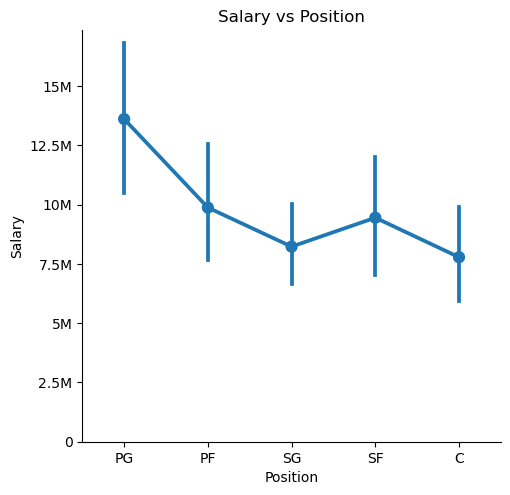

In [9]:
plt.figure(figsize=(12, 8))
sns.catplot(x='position',
            y='salary',
            data=df_position,
            kind='point',
            estimator='mean',
           )
plt.title('Salary vs Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.yticks([0, 2.5e6, 5e6, 7.5e6, 1e7, 1.25e7, 1.5e7],
           ['0', '2.5M','5M', '7.5M', '10M', '12.5M', '15M'])
plt.show()
# it seems point guards are paid more

### Team

In [10]:
#turning team back into a list
for i in range(len(df['team'])):
    string = df['team'][i]
    string = string.strip("[]'")
    df.at[i, 'team'] = string.split("', '")

In [11]:
dictionary_team = {}
df_team = pd.DataFrame(dictionary_team)
for i in range(len(df['team'])):
    list_of_team = df['team'][i]
    for j in range(len(list_of_team)):
        row = {'team':list_of_team[j],
               'salary':df['salary'][i]}
        df_team = df_team.append(row, ignore_index=True)
#now we have a dataframe of single teams with their associated salaries.

<Figure size 10000x10000 with 0 Axes>

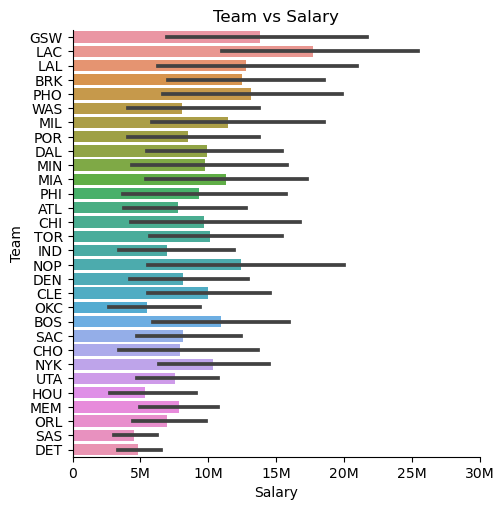

In [12]:
# because our team column has 30 different categories, we will use a horizontal bar chart
plt.figure(figsize=(100,100))
sns.catplot(x='salary',
            y='team',
            data=df_team,
            kind='bar',
            estimator='mean'
           )
plt.title('Team vs Salary')
plt.ylabel('Team')
plt.xlabel('Salary')
plt.xticks([0, 5e6, 1e7,1.5e7,2e7,2.5e7,3e7],
           ['0', '5M', '10M', '15M', '20M', '25M', '30M'])
plt.show()
#it appears that the Los Angeles Clippers have a higher average salary than the other teams

# Relationships between Variables

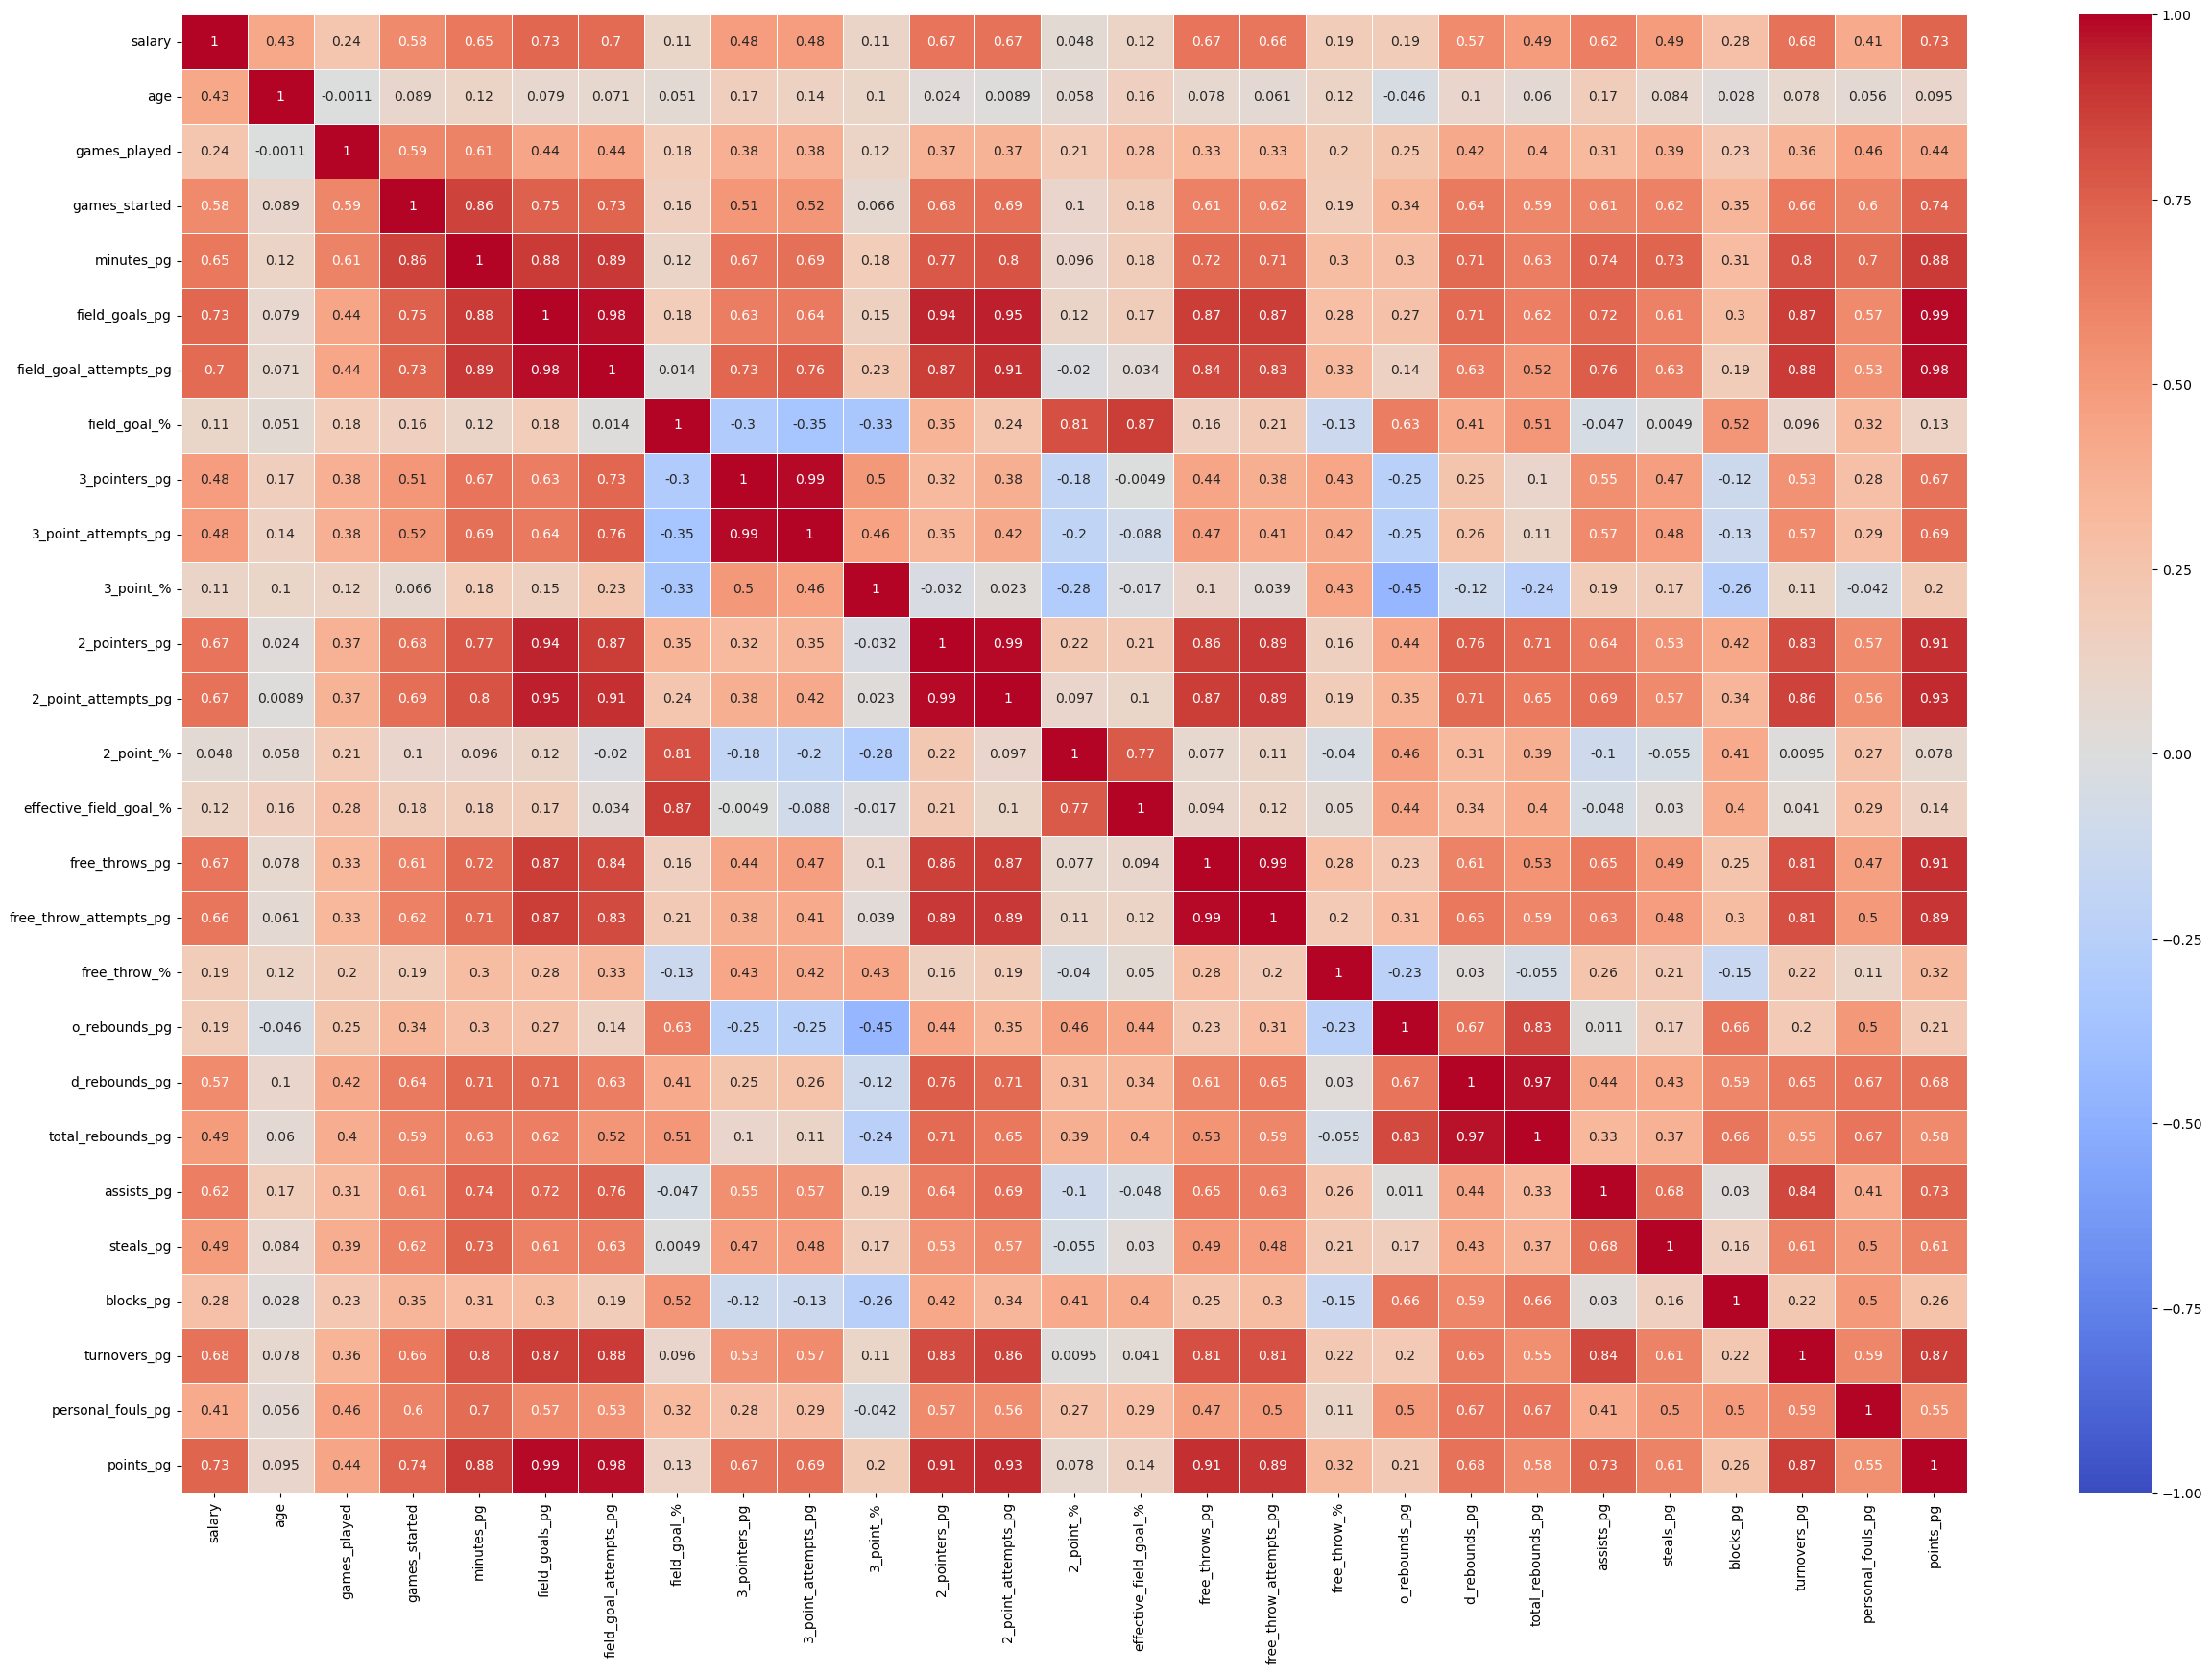

In [15]:
# Creating heatmap to examine correlation coefficients between salary and other variables
correlation_matrix = df.corr()
plt.subplots(figsize=(30,20))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=.5,
            vmin=-1, # to make sure colors do not scale to our lowest and highest correlation coefficients
            vmax=1.0);

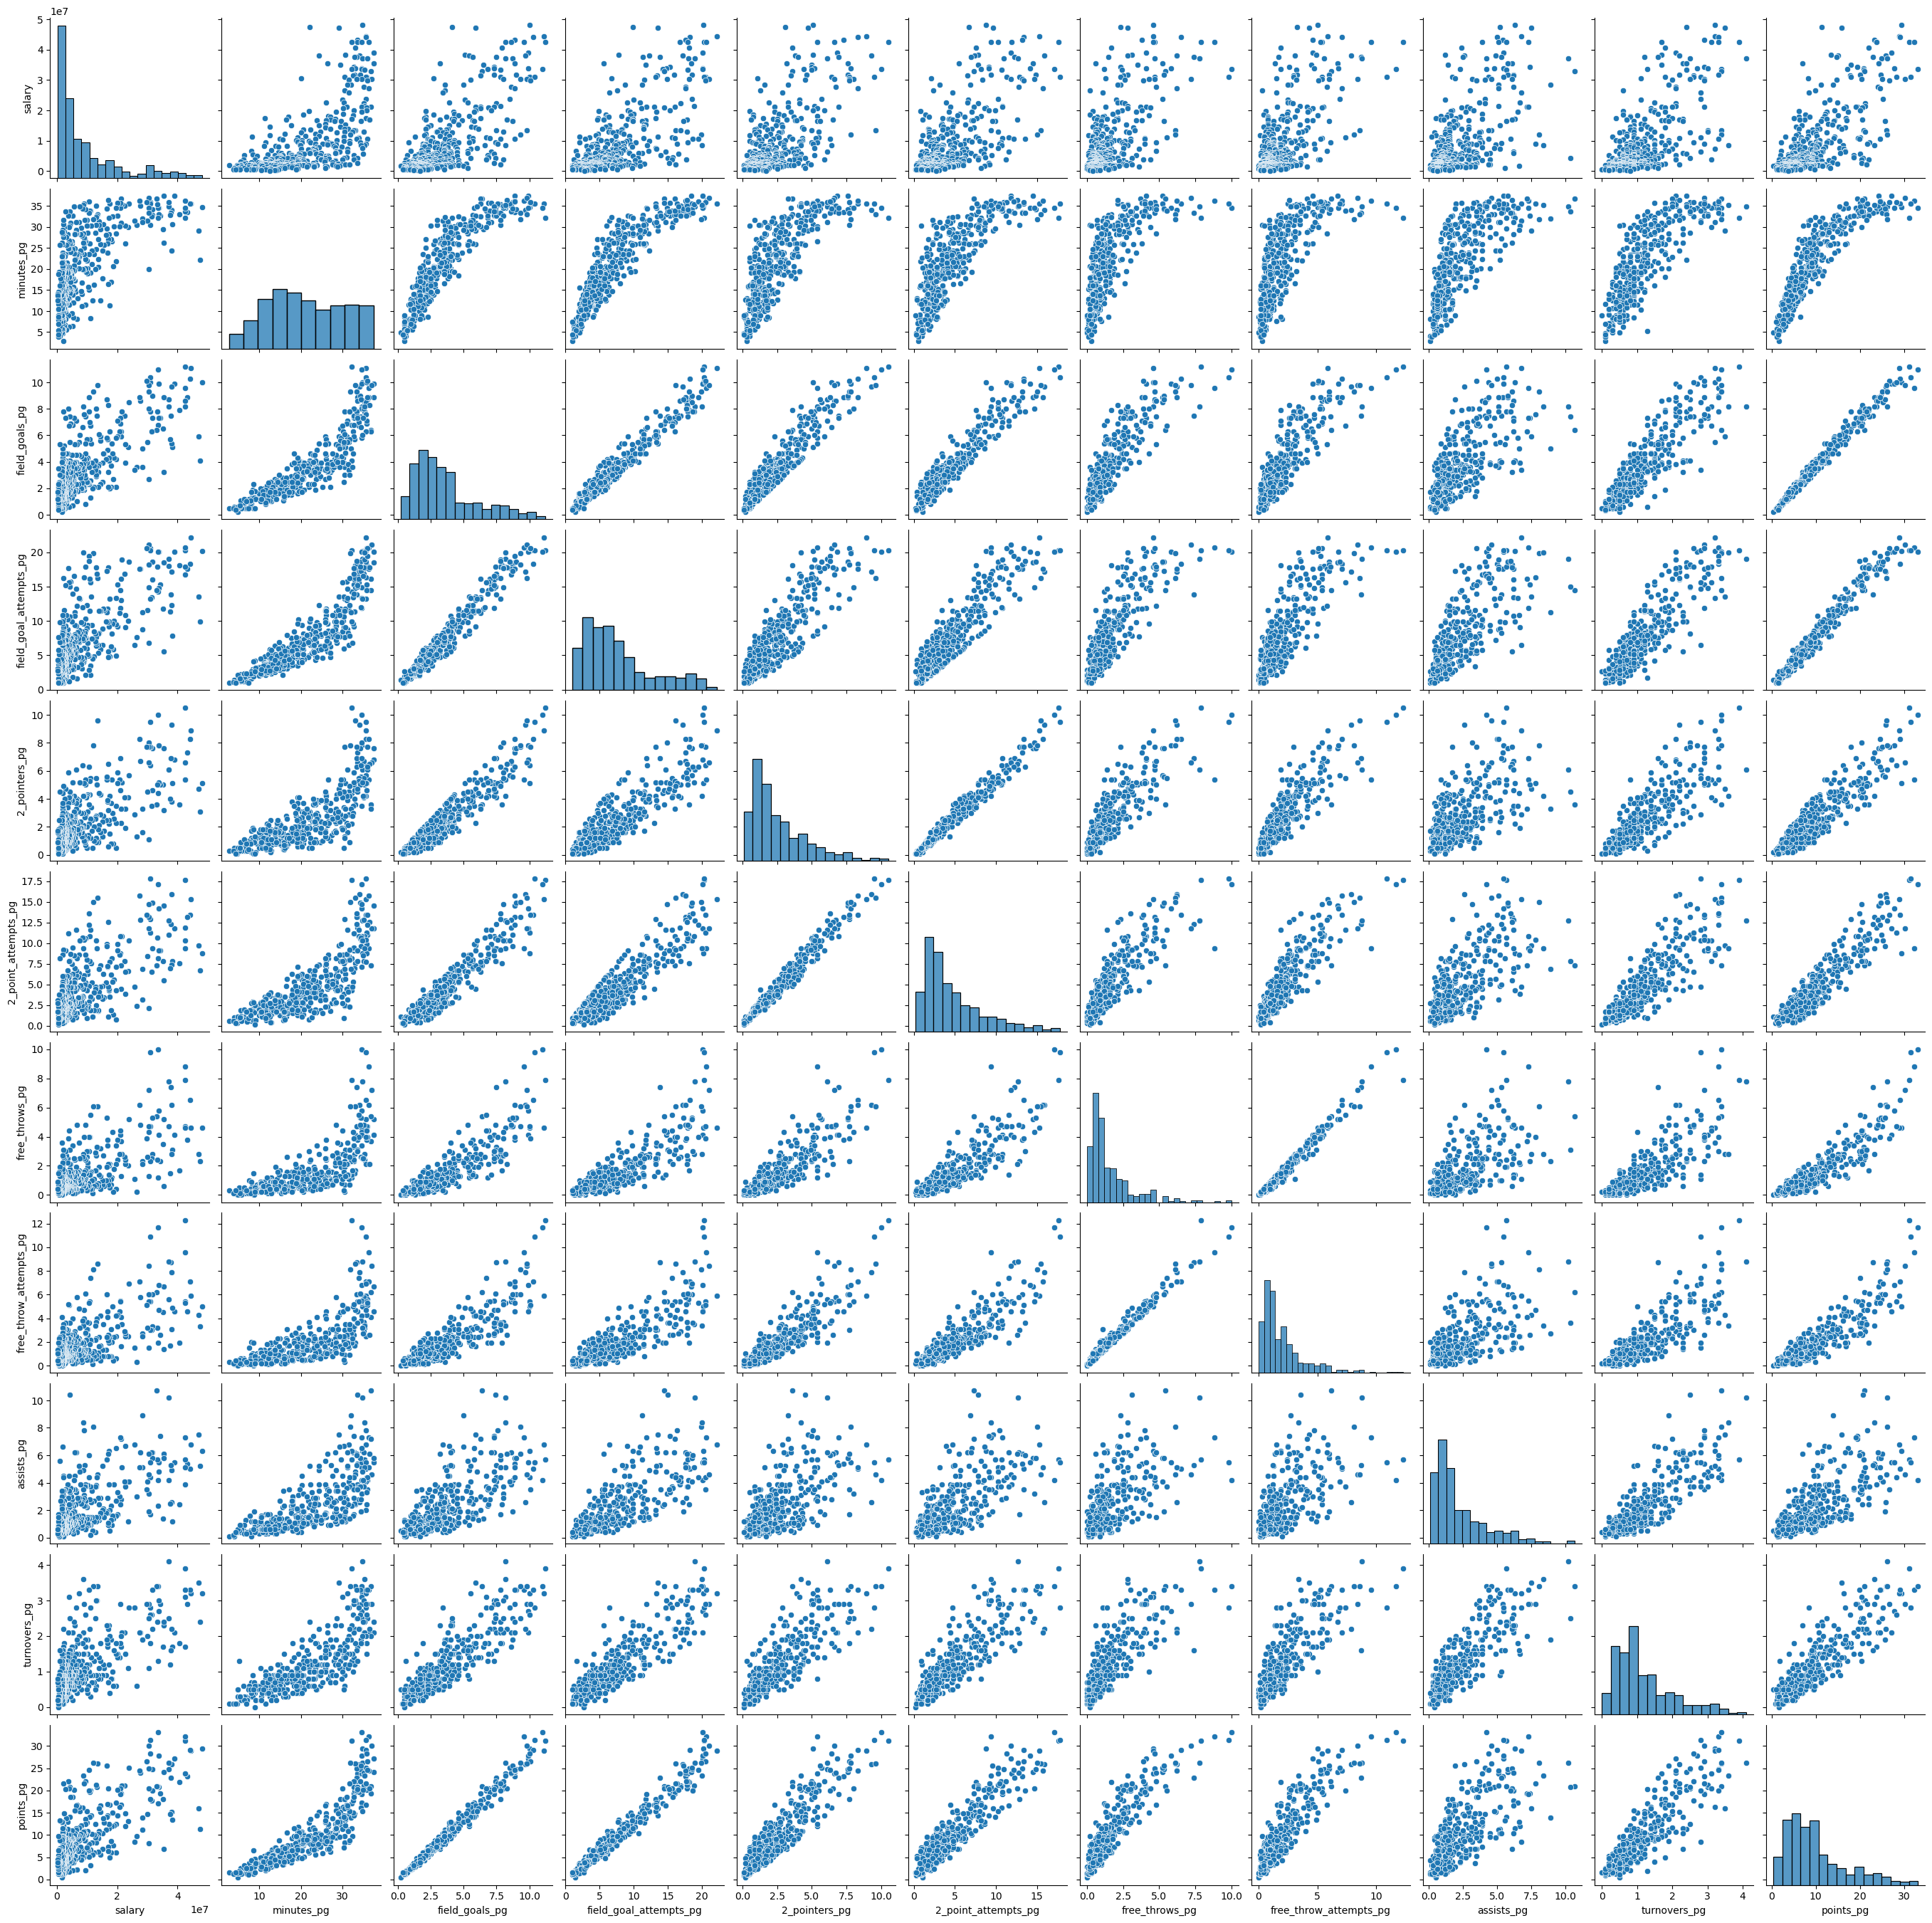

In [16]:
# Taking a look at all columns with a correlation coefficient above 0.60 from our heatmap
# removing columns that use attempts?
df_num = df[['salary','minutes_pg','field_goals_pg','2_pointers_pg','free_throws_pg','assists_pg','turnovers_pg','points_pg']]
sns.pairplot(df_num, corner=False)
plt.show()

### Notes:
#### 1. Turnovers per game being well correlated with salary is counterintuitive. Why would a highly valued player cause more turnovers? Considering that a player who handles the ball more, passes more, and shoots more, is more likely to err, the high correlation between turnovers_pg and salary makes much more sense.
#### 2. The shooting statistics columns and their respective attempts_pg columns don't seem to offer much new information. They follow similar trends and in all cases have very similar correlation coefficients. I'll try dropping these columns to make our features a bit more concise.
#### 3. A lower correlation coefficient threshold might be useful here. The currently selected features are all offensive metrics. Rebounds and steals are both moderately correlated with salary and might make for more accurate predictions